URL: https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
train_data = pd.read_csv("Train.csv")

In [4]:
train_data["Datetime"] = pd.to_datetime(train_data["Datetime"], dayfirst="True")

In [5]:
train_data = train_data.sort_values(by="Datetime")

In [6]:
train_data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [7]:
train_data.tail()

,ID,Datetime,Count
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580
18287,18287,2014-09-25 23:00:00,534


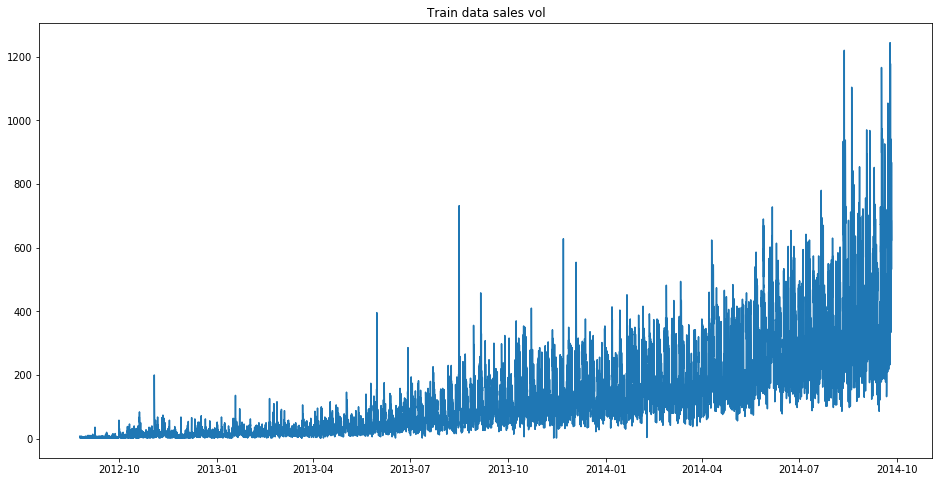

In [47]:
plt.figure(figsize=(16,8))

plt.plot(train_data["Datetime"], train_data["Count"])
plt.title("Train data sales vol")
plt.show()

In [48]:
time_series = train_data[["Datetime", "Count"]]
time_series.index = time_series["Datetime"]
ts = time_series.drop("Datetime", axis=1)

Check for stationarity

In [49]:
from statsmodels.tsa.stattools import adfuller

#check adfuller
def check_adfuller(ts):
    result = adfuller(ts, autolag="AIC")
    print("Test statistic: ", result[0])
    print("p-val: ", result[1])
    print("Critical Values: ", result[4])
    return result

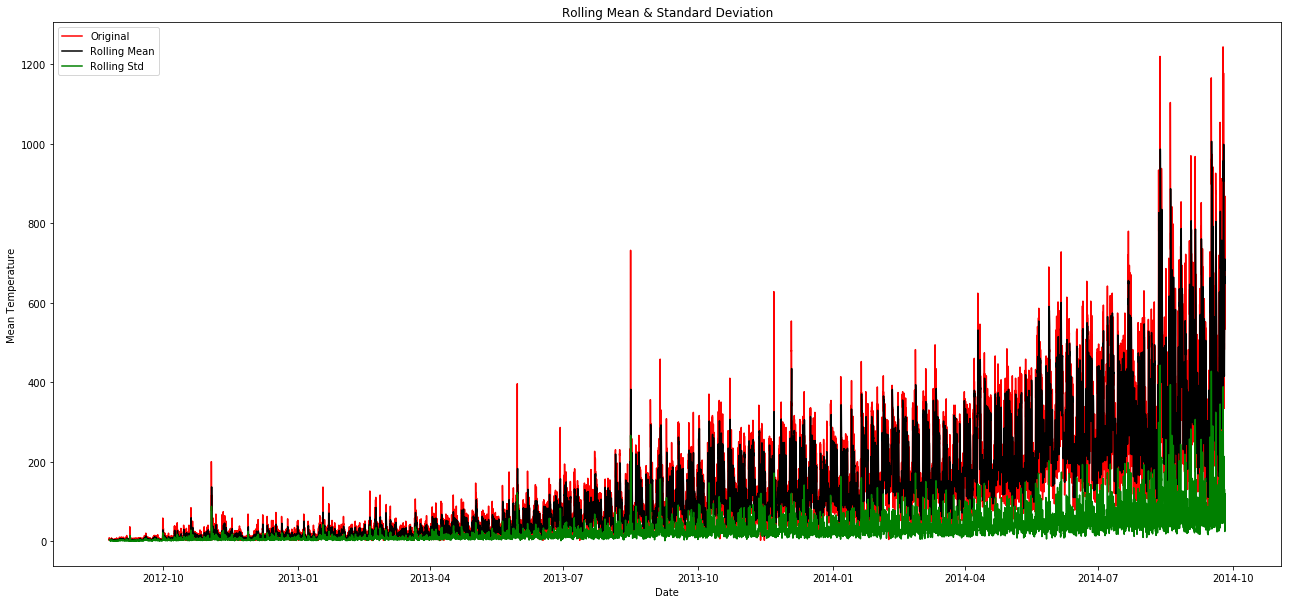

In [50]:
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    
check_mean_std(ts.Count)

In [52]:
check_adfuller(ts.Count)

Test statistic:  -4.45656053685681
p-val:  0.0002354046646766669
Critical Values:  {'1%': -3.430708525404171, '5%': -2.861698454786869, '10%': -2.5668543412994906}


(-4.45656053685681,
 0.0002354046646766669,
 45,
 18242,
 {'1%': -3.430708525404171,
  '5%': -2.861698454786869,
  '10%': -2.5668543412994906},
 181026.8337109476)

* Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look:
test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is less than the critical values. (stationary)
 


In [ ]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

check_adfuller(ts.MeanTemp)    